In [1]:
from numpy.random import seed
seed(16)
from tensorflow import set_random_seed
set_random_seed(16)

D:\anaconda3_5_0\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#获取comment文件，分为pos和neg文件
import os
pos = os.listdir('holiday_comment/pos')
neg = os.listdir('holiday_comment/neg')
print(pos)
print(len(pos))

['pos.10.txt', 'pos.100.txt', 'pos.1000.txt', 'pos.1001.txt', 'pos.1002.txt', 'pos.1003.txt', 'pos.1004.txt', 'pos.1005.txt', 'pos.1006.txt', 'pos.1007.txt', 'pos.1008.txt', 'pos.1009.txt', 'pos.101.txt', 'pos.1010.txt', 'pos.1012.txt', 'pos.1013.txt', 'pos.1014.txt', 'pos.1015.txt', 'pos.1016.txt', 'pos.1017.txt', 'pos.1018.txt', 'pos.1019.txt', 'pos.102.txt', 'pos.1020.txt', 'pos.1021.txt', 'pos.1022.txt', 'pos.1023.txt', 'pos.1024.txt', 'pos.1025.txt', 'pos.1026.txt', 'pos.1027.txt', 'pos.1028.txt', 'pos.1029.txt', 'pos.103.txt', 'pos.1030.txt', 'pos.1031.txt', 'pos.1032.txt', 'pos.1033.txt', 'pos.1034.txt', 'pos.1035.txt', 'pos.1036.txt', 'pos.1037.txt', 'pos.1038.txt', 'pos.1039.txt', 'pos.104.txt', 'pos.1040.txt', 'pos.1041.txt', 'pos.1042.txt', 'pos.1043.txt', 'pos.1044.txt', 'pos.1045.txt', 'pos.1046.txt', 'pos.1047.txt', 'pos.1048.txt', 'pos.1049.txt', 'pos.105.txt', 'pos.1050.txt', 'pos.1051.txt', 'pos.1052.txt', 'pos.1053.txt', 'pos.1054.txt', 'pos.1055.txt', 'pos.1056.txt',

In [3]:
all_comments_pri = []
for i in range(len(pos)):
    with open('holiday_comment/pos/'+pos[i],'r',errors='ignore') as f:
        comment =  f.read().strip()
        all_comments_pri.append(comment)
for i in range(len(neg)):
    with open('holiday_comment/neg/'+neg[i],errors='ignore') as f:
        comment =  f.read().strip()
        all_comments_pri.append(comment)
print(all_comments_pri)
        

['早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。\n\n房间本身很好。', '宾馆在小街道上，不大好找，但还好北京热心同胞很多~\n\n宾馆设施跟介绍的差不多，房间很小，确实挺小，但加上低价位因素，还是无超所值的；\n\n环境不错，就在小胡同内，安静整洁，暖气好足-_-||。。。呵\n\n还有一大优势就是从宾馆出发，步行不到十分钟就可以到梅兰芳故居等等，京味小胡同，北海距离好近呢。\n\n总之，不错。\n\n推荐给节约消费的自助游朋友~比较划算，附近特色小吃很多~', 'CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风', '总的来说，这样的酒店配这样的价格还算可以，希望他赶快装修，给我的客人留些好的印象', '价格比比较不错的酒店。这次免费升级了，感谢前台服务员。房子还好，地毯是新的，比上次的好些。早餐的人很多要早去些。', '不错，在同等档次酒店中应该是值得推荐的！', '入住丽晶，感觉很好。因为是新酒店，的确有淡淡的油漆味， 房间内较新。房间大小合适，卫生间设备齐全，服务态度也很好。网速可能是提升了吧，感觉还好。有免费的插线板、水果刀。。。等一系列的日常用品免费提供，很细心。晚上的自助餐是每人68元，菜品一般、就算说的过去吧。酒店外有西贝筱面等几家饭馆。西贝的菜实在是量大的惊人，人多在酒店吃就不如去西贝吃了。酒店21：30-24点有广式晚茶，吃过几次，味道正宗，就是点心品种略少。哈。\n\n酒店地处青山区，包头分昆区、青山区。相对来说：昆区是最繁华的，青山区次之。像包百等大商场全在昆区，从酒店打车到包百商圈车费12元多。青山区也有一个王府井百货，相对来说比包百商圈的略小，从酒店打车8元多。银河广场离酒店有一段距离，打车9、10元吧，银河广场边上有“科丽珑”24小时营业的超市。酒店一楼有小卖部，周围基本没有超市。\n\n这次住正赶上有几家公司在这里开会，有时楼道里略吵，晚上还有几次有人敲错门，理论上与酒店管理没关系吧。希望以后还是尽量让会议团体住在一层，也许这样可以好些吧。总体感觉丽晶很好，以后来包头还会住这里。', '1。酒店比较新，装潢和设施还不错，只是房间有些油漆味。\n\n2。早餐还可以，只是品种不是很多。\n\n3。交通比较方便，周围的小饭店比较多。', '我住的是特色标间，所谓特色，是有些类似家的感觉

In [4]:
import re
all_comments = [re.sub('[\n]+','',i) for i in all_comments_pri] #去除comment中的\n
all_comments = [''.join(re.findall(u'[\u4e00-\u9fff]+',x)) for x in all_comments]  #去掉中文外的其他字符，其实上面可以不用去掉\n，因为这一步也可以一起去掉
print(all_comments)

['早餐太差无论去多少人那边也不加食品的酒店应该重视一下这个问题了房间本身很好', '宾馆在小街道上不大好找但还好北京热心同胞很多宾馆设施跟介绍的差不多房间很小确实挺小但加上低价位因素还是无超所值的环境不错就在小胡同内安静整洁暖气好足呵还有一大优势就是从宾馆出发步行不到十分钟就可以到梅兰芳故居等等京味小胡同北海距离好近呢总之不错推荐给节约消费的自助游朋友比较划算附近特色小吃很多', '中心周围没什么店铺说星有点勉强不知道为什么卫生间没有电吹风', '总的来说这样的酒店配这样的价格还算可以希望他赶快装修给我的客人留些好的印象', '价格比比较不错的酒店这次免费升级了感谢前台服务员房子还好地毯是新的比上次的好些早餐的人很多要早去些', '不错在同等档次酒店中应该是值得推荐的', '入住丽晶感觉很好因为是新酒店的确有淡淡的油漆味房间内较新房间大小合适卫生间设备齐全服务态度也很好网速可能是提升了吧感觉还好有免费的插线板水果刀等一系列的日常用品免费提供很细心晚上的自助餐是每人元菜品一般就算说的过去吧酒店外有西贝筱面等几家饭馆西贝的菜实在是量大的惊人人多在酒店吃就不如去西贝吃了酒店点有广式晚茶吃过几次味道正宗就是点心品种略少哈酒店地处青山区包头分昆区青山区相对来说昆区是最繁华的青山区次之像包百等大商场全在昆区从酒店打车到包百商圈车费元多青山区也有一个王府井百货相对来说比包百商圈的略小从酒店打车元多银河广场离酒店有一段距离打车元吧银河广场边上有科丽珑小时营业的超市酒店一楼有小卖部周围基本没有超市这次住正赶上有几家公司在这里开会有时楼道里略吵晚上还有几次有人敲错门理论上与酒店管理没关系吧希望以后还是尽量让会议团体住在一层也许这样可以好些吧总体感觉丽晶很好以后来包头还会住这里', '酒店比较新装潢和设施还不错只是房间有些油漆味早餐还可以只是品种不是很多交通比较方便周围的小饭店比较多', '我住的是特色标间所谓特色是有些类似家的感觉寝具不是单调的白色是条纹和大格子的感觉很温馨圈儿椅的靠垫是卡通的加菲猫头明黄的颜色有点扎眼和周围配在一起感觉有点不协调客房硬件评价分加湿器烫衣板电熨斗吹风机小冰箱等俱全缺点液晶电视固定在墙上位置不好一是遮挡了一个电源插座二是与桌子搭配不当桌子与冰箱柜一体在电视下方如果坐在桌子旁上网或工作学习正好挡住了电视屏幕错开坐正好是冰箱柜腿脚伸不开', '早餐很丰富服务

In [5]:
import jieba
all_comments_cut = [list(jieba.cut(i)) for i in all_comments]
print(all_comments_cut)
from gensim.models import KeyedVectors
w2v_model = KeyedVectors.load_word2vec_format('../w2v/multi-article-w2v/load_data/w2v_of_muti_txt.txt') #加载训练好的词向量，这里的词向量是我搜集的一些预料，使用为v训练好的
print(w2v_model)
w2v_model['明教']
# 找出最相近的词，余弦相似度
w2v_model.most_similar(positive=['张无忌'], topn=50)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YWZQ\AppData\Local\Temp\jieba.cache
Loading model cost 1.286 seconds.
Prefix dict has been built succesfully.


[['早餐', '太', '差', '无论', '去', '多少', '人', '那边', '也', '不加', '食品', '的', '酒店', '应该', '重视', '一下', '这个', '问题', '了', '房间', '本身', '很', '好'], ['宾馆', '在', '小', '街道', '上', '不大好', '找', '但', '还好', '北京', '热心', '同胞', '很多', '宾馆', '设施', '跟', '介绍', '的', '差不多', '房间', '很小', '确实', '挺', '小', '但', '加上', '低价位', '因素', '还是', '无超', '所值', '的', '环境', '不错', '就', '在', '小', '胡同', '内', '安静', '整洁', '暖气', '好足', '呵', '还有', '一大', '优势', '就', '是从', '宾馆', '出发', '步行', '不到', '十分钟', '就', '可以', '到', '梅兰芳', '故居', '等等', '京味', '小', '胡同', '北海', '距离', '好近', '呢', '总之', '不错', '推荐', '给', '节约', '消费', '的', '自助游', '朋友', '比较', '划算', '附近', '特色小吃', '很多'], ['中心', '周围', '没什么', '店铺', '说星', '有点', '勉强', '不', '知道', '为什么', '卫生间', '没有', '电吹风'], ['总的来说', '这样', '的', '酒店', '配', '这样', '的', '价格', '还', '算', '可以', '希望', '他', '赶快', '装修', '给', '我', '的', '客人', '留些', '好', '的', '印象'], ['价格比', '比较', '不错', '的', '酒店', '这次', '免费', '升级', '了', '感谢', '前台', '服务员', '房子', '还好', '地毯', '是', '新', '的', '比', '上次', '的', '好些', '早餐', '的', '人', '很多', '要', '早', '去', '些'], ['不错', '在'

D:\anaconda3_5_0\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


D:\anaconda3_5_0\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('周芷若', 0.9245854616165161),
 ('张翠山', 0.9231156706809998),
 ('赵敏', 0.9013751745223999),
 ('金花婆婆', 0.8945722579956055),
 ('宋青书', 0.887113630771637),
 ('谢逊', 0.8830702304840088),
 ('灭绝师太', 0.8809691667556763),
 ('殷素素', 0.8715586066246033),
 ('俞岱岩', 0.8665016293525696),
 ('朱长龄', 0.8490869998931885),
 ('鹿杖客', 0.847365140914917),
 ('殷梨亭', 0.8444300889968872),
 ('纪晓芙', 0.8360263705253601),
 ('蛛儿', 0.8331582546234131),
 ('张三丰', 0.830396294593811),
 ('俞莲舟', 0.8288241624832153),
 ('胡青牛', 0.8239223957061768),
 ('他', 0.8231759667396545),
 ('她', 0.8125061392784119),
 ('何太冲', 0.8097409605979919),
 ('都大锦', 0.809492826461792),
 ('小昭', 0.7999586462974548),
 ('张君宝', 0.7973201274871826),
 ('白龟寿', 0.7964984774589539),
 ('殷离', 0.7951323390007019),
 ('杨不悔', 0.7930231094360352),
 ('鹤笔翁', 0.7871159911155701),
 ('圆真', 0.7795505523681641),
 ('鲜于通', 0.769331693649292),
 ('西华子', 0.7689494490623474),
 ('郭襄', 0.7687864303588867),
 ('各人', 0.7683919668197632),
 ('陈友谅', 0.768011212348938),
 ('敌人', 0.7678310871124268

In [6]:
all_comment_token = []
for text in all_comments:
    text_cut = list(jieba.cut(text))
    for i,word in enumerate(text_cut):
        try:
            text_cut[i] = w2v_model.vocab[word].index
        except KeyError:
            text_cut[i] =0
    all_comment_token.append(text_cut)
print(all_comments_pri[0])
print(all_comment_token[0])

早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。

房间本身很好。
[493, 728, 780, 6387, 116, 1628, 31, 4389, 43, 19436, 585, 0, 82, 976, 7627, 644, 251, 307, 4, 122, 4625, 72, 98]


In [7]:
num_token = [len(token) for token in all_comment_token]
import numpy as np
print(np.mean(num_token))
print(np.max(num_token))

68.13825
1394


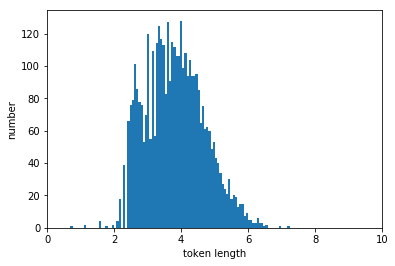

In [8]:
import matplotlib.pyplot as plt
plt.hist(np.log(num_token),bins=100)
plt.xlim((0,10))
plt.xlabel('token length')
plt.ylabel('number')
plt.show()

In [9]:
max_token = np.mean(num_token)+2*np.std(num_token)
max_token = int(max_token)
print(max_token)
num_token = np.array(num_token)
print(np.sum(num_token<max_token)/len(num_token))

224
0.95575


In [10]:
# token数字转换为文本
def token2text(tokens):
    print(tokens)
    text_list = [w2v_model.index2word[i] if i!=0 else ' ' for i in tokens]
    return ''.join(text_list)

In [11]:
token2text_exmple = token2text(all_comment_token[0])
print(token2text_exmple)
print(all_comments_pri[0])

[493, 728, 780, 6387, 116, 1628, 31, 4389, 43, 19436, 585, 0, 82, 976, 7627, 644, 251, 307, 4, 122, 4625, 72, 98]
早餐太差无论去多少人那边也不加食品 酒店应该重视一下这个问题了房间本身很好
早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。

房间本身很好。


In [12]:
embedding_dim = w2v_model['少林'].shape[0]  #词向量的维度
embedding_dim

100

In [13]:
# 只使用前60000个词
num_words = 60000
# 初始化embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, embedding_dim))
# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵
# 维度为 60000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = w2v_model[w2v_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')
embedding_matrix

array([[-0.1920059 ,  0.62588423,  0.79755443, ...,  0.28504688,
        -0.17318423, -0.38960975],
       [-2.1175542 , -0.71664727, -0.01496693, ..., -0.98251396,
         0.29287437,  0.379646  ],
       [-2.0310047 ,  1.4911472 , -1.4238049 , ...,  0.5543877 ,
         1.1969128 ,  1.8575232 ],
       ...,
       [-0.06491695,  0.05332117, -0.19433841, ..., -0.03545978,
        -0.1789634 ,  0.12878738],
       [-0.11900326,  0.13791575, -0.08661851, ...,  0.03306982,
         0.11042161,  0.26252213],
       [ 0.06531112, -0.01612447, -0.08936662, ...,  0.02407851,
        -0.00693627, -0.06665338]], dtype=float32)

In [14]:
# 检查index是否对应，
# 输出300意义为长度为300的embedding向量一一对应
print(np.sum( w2v_model[w2v_model.index2word[333]] == embedding_matrix[333] ))
print(embedding_matrix.shape)

100
(60000, 100)


padding（填充）和truncating（修剪）
我们把文本转换为tokens（索引）之后，每一串索引的长度并不相等，所以为了方便模型的训练我们需要把索引的长度标准化，
上面我们选择了224,这个可以涵盖0.95575%训练样本的长度，接下来我们进行padding和truncating，我们一般采用'pre'的方法，
这会在文本索引的前面填充0，因为根据一些研究资料中的实践，如果在文本索引后面填充0的话，会对模型造成一些不良影响。

In [15]:
from keras.models import Sequential
from keras.layers import Dense,GRU,Embedding,LSTM,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard,ReduceLROnPlateau
from keras import initializers

Using TensorFlow backend.


In [16]:
all_comment_token_pad = pad_sequences(all_comment_token,maxlen=max_token,padding='pre',truncating='pre')
all_comment_token_pad[all_comment_token_pad>=num_words] = 0  # 超出前60000的词向量的词用0代替
all_comment_token_pad[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [17]:
# 准备target向量，前2000样本为1，后2000为0
all_label = np.concatenate((np.ones(2000),np.zeros(2000)))
all_label

array([1., 1., 1., ..., 0., 0., 0.])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(all_comment_token_pad,all_label,test_size=0.1,random_state=16)

In [19]:
# 查看训练样本，确认无误
print(token2text(X_train[16]))
print('class: ',y_train[16])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [20]:
'''
现在我们用keras搭建LSTM模型，模型的第一层是Embedding层，只有当我们把tokens索引转换为词向量矩阵之后，才可以用神经网络对文本进行处理。 keras提供了Embedding接口，避免了繁琐的稀疏矩阵操作。
在Embedding层我们输入的矩阵为：
(batchsize,maxtokens)
 
输出矩阵为：
(batchsize,maxtokens,embeddingdim)
构建模型
GRU：如果使用GRU的话，测试样本可以达到87%的准确率，但我测试自己的文本内容时发现，GRU最后一层激活函数的输出都在0.5左右，说明模型的判断不是很明确，信心比较低，而且经过测试发现模型对于否定句的判断有时会失误，我们期望对于负面样本输出接近0，正面样本接近1而不是都徘徊于0.5之间。
BiLSTM：测试了LSTM和BiLSTM，发现BiLSTM的表现最好，LSTM的表现略好于GRU，这可能是因为BiLSTM对于比较长的句子结构有更好的记忆，有兴趣的朋友可以深入研究一下。
Embedding之后第，一层我们用BiLSTM返回sequences，然后第二层16个单元的LSTM不返回sequences，只返回最终结果，最后是一个全链接层，用sigmoid激活函数输出结果。
'''

'\n现在我们用keras搭建LSTM模型，模型的第一层是Embedding层，只有当我们把tokens索引转换为词向量矩阵之后，才可以用神经网络对文本进行处理。 keras提供了Embedding接口，避免了繁琐的稀疏矩阵操作。\n在Embedding层我们输入的矩阵为：\n(batchsize,maxtokens)\n \n输出矩阵为：\n(batchsize,maxtokens,embeddingdim)\n构建模型\nGRU：如果使用GRU的话，测试样本可以达到87%的准确率，但我测试自己的文本内容时发现，GRU最后一层激活函数的输出都在0.5左右，说明模型的判断不是很明确，信心比较低，而且经过测试发现模型对于否定句的判断有时会失误，我们期望对于负面样本输出接近0，正面样本接近1而不是都徘徊于0.5之间。\nBiLSTM：测试了LSTM和BiLSTM，发现BiLSTM的表现最好，LSTM的表现略好于GRU，这可能是因为BiLSTM对于比较长的句子结构有更好的记忆，有兴趣的朋友可以深入研究一下。\nEmbedding之后第，一层我们用BiLSTM返回sequences，然后第二层16个单元的LSTM不返回sequences，只返回最终结果，最后是一个全链接层，用sigmoid激活函数输出结果。\n'

In [21]:
#模型搭建
model = Sequential()
#模型第一层，embedding
model.add(Embedding(input_dim=num_words,output_dim=embedding_dim,weights=[embedding_matrix],input_length=max_token,
                    trainable=False))

In [22]:
from keras import initializers
model.add(Bidirectional(LSTM(units=32,return_sequences=True)))
model.add(LSTM(units=16,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
optimizer = Adam(lr=1e-3)

In [23]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 224, 100)          6000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 224, 64)           34048     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 6,039,249
Trainable params: 39,249
Non-trainable params: 6,000,000
_________________________________________________________________


In [25]:
path_checkpoint = 'mycheckpoint/ck.h5'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=False,
                                      save_best_only=False)

In [26]:
# 尝试加载已训练模型
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

In [27]:
import logging
logger = logging.getLogger('mylogger')
logger.setLevel(logging.DEBUG)

# 创建一个handler，用于输出到控制台
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# 定义handler的输出格式
formatter = logging.Formatter('[%(asctime)s][%(levelname)s] ## %(message)s')
ch.setFormatter(formatter)
# 给logger添加handler
logger.addHandler(ch)

In [28]:
import keras


class Batch_LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.acces = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.acces.append(logs.get('acc'))
    
class Epoch_LossHistory(keras.callbacks.Callback):
    def on_epoch_begin(self,eopch,logs={}):
        self.losses = []
        self.acces = []

    def on_epoch_end(self,epoch,logs={}):
        self.losses.append(logs.get('val_loss'))
        self.acces.append(logs.get('val_acc'))
        logger.info('epoch: %d,val_acc:%.4f'%(epoch,logs.get('val_acc')))
        
batch_history = Batch_LossHistory()
epoch_history = Epoch_LossHistory()

In [29]:
earlystopping = EarlyStopping(monitor='val_loss',patience=3,verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss',factor=0.1,min_lr=1e-5,patience=2,verbose=1)
callbacks = [earlystopping,checkpoint,lr_reduction,batch_history,epoch_history]

In [30]:

'''
import logging
logger = logging.getLogger('mylogger')
logger.setLevel(logging.DEBUG)

# 创建一个handler，用于输出到控制台
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# 定义handler的输出格式
formatter = logging.Formatter('[%(asctime)s][%(levelname)s] ## %(message)s')
ch.setFormatter(formatter)
# 给logger添加handler
logger.addHandler(ch)
'''

"\nimport logging\nlogger = logging.getLogger('mylogger')\nlogger.setLevel(logging.DEBUG)\n\n# 创建一个handler，用于输出到控制台\nch = logging.StreamHandler()\nch.setLevel(logging.DEBUG)\n\n# 定义handler的输出格式\nformatter = logging.Formatter('[%(asctime)s][%(levelname)s] ## %(message)s')\nch.setFormatter(formatter)\n# 给logger添加handler\nlogger.addHandler(ch)\n"

In [31]:
model.fit(X_train,y_train,validation_split=0.1,epochs=20,batch_size=128,shuffle=True,callbacks=callbacks)

Train on 3240 samples, validate on 360 samples
Epoch 1/20
3240/3240 [==============================] - 29s 9ms/step - loss: 0.4318 - acc: 0.8080 - val_loss: 0.4153 - val_acc: 0.8333

Epoch 00001: saving model to mycheckpoint/ck.h5


[2019-05-17 18:57:52,921][INFO] ## epoch: 0,val_acc:0.8333


Epoch 2/20
3240/3240 [==============================] - 26s 8ms/step - loss: 0.3960 - acc: 0.8306 - val_loss: 0.4230 - val_acc: 0.8000


[2019-05-17 18:58:19,407][INFO] ## epoch: 1,val_acc:0.8000



Epoch 00002: saving model to mycheckpoint/ck.h5
Epoch 3/20
3240/3240 [==============================] - 27s 8ms/step - loss: 0.4141 - acc: 0.8093 - val_loss: 0.4266 - val_acc: 0.8250

Epoch 00003: saving model to mycheckpoint/ck.h5


[2019-05-17 18:58:47,085][INFO] ## epoch: 2,val_acc:0.8250



Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/20
3240/3240 [==============================] - 26s 8ms/step - loss: 0.3715 - acc: 0.8500 - val_loss: 0.4087 - val_acc: 0.8111

Epoch 00004: saving model to mycheckpoint/ck.h5

[2019-05-17 18:59:13,795][INFO] ## epoch: 3,val_acc:0.8111



Epoch 5/20
3240/3240 [==============================] - 26s 8ms/step - loss: 0.3508 - acc: 0.8574 - val_loss: 0.3866 - val_acc: 0.8417


[2019-05-17 18:59:39,907][INFO] ## epoch: 4,val_acc:0.8417



Epoch 00005: saving model to mycheckpoint/ck.h5
Epoch 6/20
3240/3240 [==============================] - 27s 8ms/step - loss: 0.3521 - acc: 0.8549 - val_loss: 0.3949 - val_acc: 0.8472


[2019-05-17 19:00:06,847][INFO] ## epoch: 5,val_acc:0.8472



Epoch 00006: saving model to mycheckpoint/ck.h5
Epoch 7/20
3240/3240 [==============================] - 30s 9ms/step - loss: 0.3480 - acc: 0.8540 - val_loss: 0.3989 - val_acc: 0.8361

Epoch 00007: saving model to mycheckpoint/ck.h5


[2019-05-17 19:00:36,852][INFO] ## epoch: 6,val_acc:0.8361



Epoch 00007: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 8/20
3240/3240 [==============================] - 30s 9ms/step - loss: 0.3457 - acc: 0.8586 - val_loss: 0.3953 - val_acc: 0.8361


[2019-05-17 19:01:06,715][INFO] ## epoch: 7,val_acc:0.8361



Epoch 00008: saving model to mycheckpoint/ck.h5
Epoch 00008: early stopping


In [32]:
model_emotion = model.save_weights('savemodel/emotion.h5')

In [33]:
test_evaluate = model.evaluate(X_test,y_test)
print('accuracy:{0:.3%}'.format(test_evaluate[1]))

400/400 [==============================] - 1s 4ms/step
accuracy:84.250%


In [34]:
def predict_sentence_clean(sentence):
    
    text_cut = list(jieba.cut(sentence))
    for i,word in enumerate(text_cut):
        try:
            text_cut[i] = w2v_model.vocab[word].index
        except KeyError:
            text_cut[i] =0
   
    # padding
    tokens_pad = pad_sequences([text_cut], maxlen=max_token,
                           padding='pre', truncating='pre')
    tokens_pad[tokens_pad>=num_words] = 0  # 超出前60000的词向量的词用0代替
    # 预测
    result = model.predict(x=tokens_pad)
    coef = result[0][0]
    if coef >= 0.5:
        print('是一例正面评价','output=%.2f'%coef)
    else:
        print('是一例负面评价','output=%.2f'%coef)
    

In [35]:
test_list = [
    '酒店设施不是新的，服务态度很不好',
    '酒店卫生条件非常不好',
    '床铺非常舒适',
    '房间很好，很满意',
    '房间很凉爽，空调冷气很足',
    '酒店环境不好，住宿体验很不好',
    '房间隔音不到位' ,
    '晚上回来发现没有打扫卫生',
    '因为过节所以要我临时加钱，比团购的价格贵'
]
for text in test_list:
    predict_sentence_clean(text)

是一例负面评价 output=0.35
是一例负面评价 output=0.25
是一例正面评价 output=0.51
是一例正面评价 output=0.95
是一例负面评价 output=0.30
是一例负面评价 output=0.37
是一例负面评价 output=0.16
是一例负面评价 output=0.27
是一例负面评价 output=0.24


In [36]:
print(batch_history.losses)
print(batch_history.acces)
print(epoch_history.losses)
print(epoch_history.acces)
print(len(batch_history.losses))

[0.47078437, 0.47453856, 0.49553064, 0.34720504, 0.40463597, 0.5096376, 0.4822201, 0.4864716, 0.40397623, 0.3664273, 0.40074137, 0.4474594, 0.3658036, 0.4332809, 0.39642352, 0.4026255, 0.39045638, 0.3572896, 0.46592957, 0.45901358, 0.36560553, 0.47411406, 0.47926813, 0.42651793, 0.48040318, 0.45854664, 0.41381907, 0.37547266, 0.4147354, 0.4207468, 0.4017421, 0.35840207, 0.3807329, 0.34473103, 0.41786987, 0.38209683, 0.39532435, 0.40015483, 0.35973305, 0.45474237, 0.35466707, 0.3990423, 0.40472457, 0.36338902, 0.3803047, 0.39143223, 0.44131118, 0.4278587, 0.39457864, 0.39633837, 0.3921646, 0.50513154, 0.37008536, 0.46312344, 0.46851853, 0.51926076, 0.48413646, 0.44636995, 0.33615518, 0.37289193, 0.42115006, 0.4560836, 0.41096818, 0.4234463, 0.38004208, 0.38517705, 0.3638206, 0.37256247, 0.37515044, 0.31223738, 0.50296307, 0.41956168, 0.40048486, 0.33033505, 0.43917668, 0.44662797, 0.4569903, 0.39965835, 0.37715945, 0.36577123, 0.37983397, 0.42619753, 0.35393375, 0.47166887, 0.31219882, 

In [38]:
model_json = model.to_json()
with open('savemodel/emotion_json.json','w') as f:
    f.write(model_json)

In [39]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Embedding", "config": {"name": "embedding_1", "trainable": false, "batch_input_shape": [null, 224], "dtype": "float32", "input_dim": 60000, "output_dim": 100, "embeddings_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 224}}, {"class_name": "Bidirectional", "config": {"name": "bidirectional_1", "trainable": true, "layer": {"class_name": "LSTM", "config": {"name": "lstm_1", "trainable": true, "return_sequences": true, "return_state": false, "go_backwards": false, "stateful": false, "unroll": false, "units": 32, "activation": "tanh", "recurrent_activation": "hard_sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform"